# 학습 곡선

In [5]:
#learning_curve() 함수
import numpy as np

np.random.seed(42)
m=100
x=2*np.random.rand(m, 1)
y= 4+3*x+np.random.randn(m, 1)

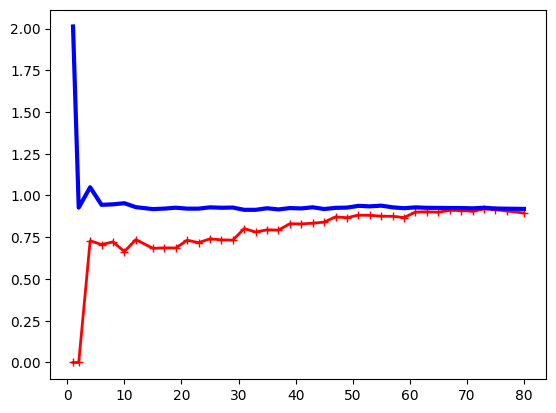

In [6]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), x, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring="neg_root_mean_squared_error")
train_errors= -train_scores.mean(axis=1)
valid_errors= -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="훈련 세트")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="검증 세트")
plt.show()

In [ ]:
#10차 다항 회귀 모델의 학습 곡선
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = make_pipeline(PolynomialFeatures(degree=10, include_bias=False), LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(polynomial_regression, x, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring="neg_root_mean_squared_error")
train_errors= -train_scores.mean(axis=1)
valid_errors= -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="훈련 세트")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="검증 세트")
plt.show()

# 규제가 있는 선형 모델

### 릿지 회귀

In [ ]:
#정규 방정식을 사용한 릿지 회귀
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(x, y)
ridge_reg.predict([[1.5]])

In [ ]:
#확률적 경사 하강법 사용
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1/m, tol=None, max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(x, y.ravel())
sgd_reg.predict([[1.5]])

### 라쏘 회귀

In [ ]:
#Lasso 클래스를 사용한 예제
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x, y)
lasso_reg.predict([[1.5]])

### 엘라스틱넷 회귀

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x, y)
elastic_net.predict([[1.5]])

# 조기 종료

In [ ]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

x_train, y_train, x_valid, y_valid = x[:70], y[:70], x[70:], y[70:]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False), StandardScaler())
x_train_prep = preprocessing.fit_transform(x_train)
x_valid_prep = preprocessing.fit_transform(x_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')

for epoch in range(n_epochs):
    sgd_reg.partial_fit(x_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(x_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error<best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

# 로지스틱 회귀

In [19]:
# 꽃잎 너비로 Iris-Versicolor 종 감지 분류기 생성
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
print( list(iris) )

print( iris.data.head(3) )

print( iris.target.head(3))

print(iris.target_names)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
0    0
1    0
2    0
Name: target, dtype: int64
['setosa' 'versicolor' 'virginica']


In [20]:
#데이터 분할, 훈련 set에서 모델 훈련
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)


LogisticRegression(random_state=42)

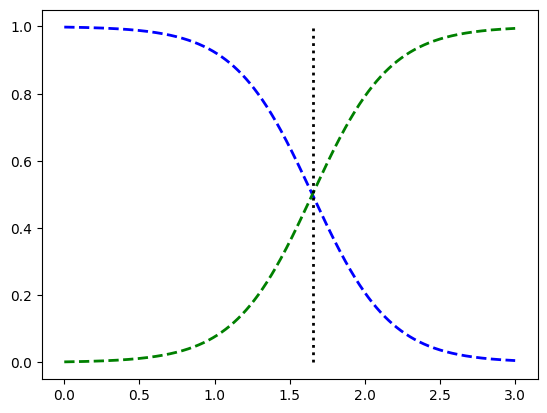

In [23]:
#꽃잎 너비가 0~3cm인 꽃에 대한 모델의 추정 확률 계산
x_new=np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(x_new)
decision_boundary = x_new[y_proba[:, 1] >= 0.5][0, 0]

plt.plot(x_new, y_proba[:, 0], "b--", linewidth=2, label = "Iris-Virginica가 아닐 확률")
plt.plot(x_new, y_proba[:, 1], "g--", linewidth=2, label = "Iris-Virginica가 맞을 확률")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="결정 경계")
plt.show()

In [24]:
print(decision_boundary)
log_reg.predict([[1.7], [1.5]])

1.6516516516516517


array([ True, False])

# 소프트맥스 회귀

In [25]:
#소프트맥스 회귀를 써서 붓꽃을 세 개의 클래스로 분류
x = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

softmax_reg=LogisticRegression(C=30, random_state=42)
softmax_reg.fit(x_train, y_train)

LogisticRegression(C=30, random_state=42)

In [26]:
#꽃잎 길이=5, 너비=2인 붓꽃 발견을 가정, 품종을 모델에 질의
print(softmax_reg.predict([[5, 2]]))

print(softmax_reg.predict_proba([[5, 2]]).round(2))

[2]
[[0.   0.04 0.96]]
